In [1]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back):]
        dataX.append(a)
        dataY.append(dataset[i:(i + look_back):])
    
    dataX=np.squeeze(dataX,axis=1) #차원 축소
    dataY=np.squeeze(dataY,axis=1) #차원 축소
    return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
data1=pd.read_excel('x_data.xls') #x좌표 엑셀 데이터 불러옴 
data2=pd.read_excel('y_data.xls') #y좌표 엑셀 데이터 불러옴 
data3=pd.read_excel('speed.xls') #speed좌표 엑셀 데이터 불러옴 

pddata1=pd.DataFrame(data1) 
pddata1.head()
pddata2=pd.DataFrame(data2) 
pddata2.head()
pddata3=pd.DataFrame(data3) 
pddata3.head()

hap=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])
    s_data=np.array(pddata3.loc[j])

    hap1=[] #[x,y,속력] 데이터를 저장하고 있는 리스트
    
    for i in range(len(s_data)): 
        sum=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum.append(x_data[i]) #x넣음
        sum.append(y_data[i]) #y넣음
        sum.append(s_data[i]) #속력넣음
        hap1.append(sum) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    hap.append(hap1)

n1 = np.array(hap)
print(n1.shape) #257,99,3 257개의 Sample과 99개 시계열, 3개 feature(x,y,속력)

(257, 99, 3)


In [5]:
num_sample = n1.shape[0] # 257개 Sample 데이터
num_sequence = n1.shape[1] # 99개 시계열 데이터
num_feature = n1.shape[2] #3개 Feature

dataset = n1

In [6]:
dataset

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [7]:
train_size = int(len(dataset) * 0.70) #학습 데이터 70%
test_size = len(dataset) - train_size #테스트 데이터 30%
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
train

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [9]:
test

array([[[383.        , 461.        ,   0.        ],
        [383.        , 461.        ,   0.        ],
        [383.        , 461.        ,   0.        ],
        ...,
        [414.        , 396.        ,   0.        ],
        [414.        , 396.        ,   4.24264069],
        [417.        , 393.        ,   0.        ]],

       [[511.        , 314.        ,   0.        ],
        [511.        , 314.        ,   0.        ],
        [511.        , 314.        ,   0.        ],
        ...,
        [531.        , 443.        ,   0.        ],
        [531.        , 443.        ,   1.41421356],
        [532.        , 444.        ,   0.        ]],

       [[534.        , 456.        ,   0.        ],
        [534.        , 456.        ,   0.        ],
        [534.        , 456.        ,   0.        ],
        ...,
        [424.        , 532.        ,   0.        ],
        [424.        , 532.        ,   0.        ],
        [424.        , 532.        ,   2.82842712]],

       ...,

      

In [10]:
np.shape(dataset)

(257, 99, 3)

In [11]:
np.shape(train)

(179, 99, 3)

In [12]:
np.shape(test)

(78, 99, 3)

In [13]:
look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
np.shape(trainX)

(177, 99, 3)

In [15]:
np.shape(testX)

(76, 99, 3)

In [16]:
np.shape(trainY)

(177, 99, 3)

In [17]:
np.shape(testY)

(76, 99, 3)

In [18]:
from keras.layers import TimeDistributed
from keras.layers import InputLayer
from keras.layers import Reshape
from keras.layers import *
from keras.models import *
from keras.utils import *

model = Sequential() # Sequeatial Model 
model.add(LSTM(32,return_sequences=True, input_shape=(num_sequence,num_feature)))  
model.add(Dense(3, activation='softmax')) # 3개의 예측
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

history = model.fit(trainX, trainY, epochs=300, batch_size=20, validation_split=0.2, verbose=1)

Train on 141 samples, validate on 36 samples
Epoch 1/300
141/141 [==============================] - 1s 7ms/step - loss: 858.4653 - accuracy: 0.3568 - val_loss: 806.2862 - val_accuracy: 0.4040
Epoch 2/300
141/141 [==============================] - 0s 3ms/step - loss: 806.6420 - accuracy: 0.4651 - val_loss: 766.4167 - val_accuracy: 0.5365
Epoch 3/300
141/141 [==============================] - 0s 3ms/step - loss: 767.0924 - accuracy: 0.5765 - val_loss: 728.7975 - val_accuracy: 0.7840
Epoch 4/300
141/141 [==============================] - 0s 3ms/step - loss: 727.9520 - accuracy: 0.7823 - val_loss: 693.8781 - val_accuracy: 0.7511
Epoch 5/300
141/141 [==============================] - 0s 3ms/step - loss: 691.8599 - accuracy: 0.8358 - val_loss: 658.8195 - val_accuracy: 0.8889
Epoch 6/300
141/141 [==============================] - 0s 3ms/step - loss: 662.3657 - accuracy: 0.9110 - val_loss: 638.9279 - val_accuracy: 0.8763
Epoch 7/300
141/141 [==============================] - 0s 3ms/step - loss

141/141 [==============================] - 0s 3ms/step - loss: 552.1858 - accuracy: 0.9295 - val_loss: 542.6121 - val_accuracy: 0.9212
Epoch 57/300
141/141 [==============================] - 0s 3ms/step - loss: 552.0991 - accuracy: 0.9289 - val_loss: 542.6093 - val_accuracy: 0.9147
Epoch 58/300
141/141 [==============================] - 0s 3ms/step - loss: 552.0095 - accuracy: 0.9302 - val_loss: 542.4410 - val_accuracy: 0.9245
Epoch 59/300
141/141 [==============================] - 0s 3ms/step - loss: 551.9374 - accuracy: 0.9339 - val_loss: 542.3833 - val_accuracy: 0.9285
Epoch 60/300
141/141 [==============================] - 0s 3ms/step - loss: 551.8429 - accuracy: 0.9388 - val_loss: 542.3024 - val_accuracy: 0.9276
Epoch 61/300
141/141 [==============================] - 0s 3ms/step - loss: 551.7848 - accuracy: 0.9381 - val_loss: 542.2505 - val_accuracy: 0.9293
Epoch 62/300
141/141 [==============================] - 0s 3ms/step - loss: 551.7313 - accuracy: 0.9414 - val_loss: 542.1795 

141/141 [==============================] - 0s 3ms/step - loss: 550.5141 - accuracy: 0.9820 - val_loss: 540.9744 - val_accuracy: 0.9781
Epoch 112/300
141/141 [==============================] - 0s 4ms/step - loss: 550.4437 - accuracy: 0.9830 - val_loss: 540.9195 - val_accuracy: 0.9745
Epoch 113/300
141/141 [==============================] - 1s 4ms/step - loss: 550.4314 - accuracy: 0.9824 - val_loss: 540.9110 - val_accuracy: 0.9790
Epoch 114/300
141/141 [==============================] - 0s 3ms/step - loss: 550.4208 - accuracy: 0.9847 - val_loss: 540.8945 - val_accuracy: 0.9792
Epoch 115/300
141/141 [==============================] - 0s 4ms/step - loss: 550.4179 - accuracy: 0.9855 - val_loss: 540.8873 - val_accuracy: 0.9801
Epoch 116/300
141/141 [==============================] - 0s 4ms/step - loss: 550.4165 - accuracy: 0.9867 - val_loss: 540.9651 - val_accuracy: 0.9792
Epoch 117/300
141/141 [==============================] - 1s 4ms/step - loss: 550.5497 - accuracy: 0.9837 - val_loss: 541

141/141 [==============================] - 1s 4ms/step - loss: 550.2778 - accuracy: 0.9836 - val_loss: 540.7290 - val_accuracy: 0.9725
Epoch 167/300
141/141 [==============================] - 1s 4ms/step - loss: 550.2625 - accuracy: 0.9784 - val_loss: 540.7183 - val_accuracy: 0.9823
Epoch 168/300
141/141 [==============================] - 1s 4ms/step - loss: 550.2549 - accuracy: 0.9823 - val_loss: 540.7097 - val_accuracy: 0.9750
Epoch 169/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2524 - accuracy: 0.9798 - val_loss: 540.6918 - val_accuracy: 0.9728
Epoch 170/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2464 - accuracy: 0.9787 - val_loss: 540.6988 - val_accuracy: 0.9826
Epoch 171/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2458 - accuracy: 0.9828 - val_loss: 540.6933 - val_accuracy: 0.9854
Epoch 172/300
141/141 [==============================] - 1s 4ms/step - loss: 550.2402 - accuracy: 0.9850 - val_loss: 540

141/141 [==============================] - 0s 3ms/step - loss: 550.1768 - accuracy: 0.9854 - val_loss: 540.6325 - val_accuracy: 0.9834
Epoch 222/300
141/141 [==============================] - 0s 3ms/step - loss: 550.1827 - accuracy: 0.9850 - val_loss: 540.6456 - val_accuracy: 0.9753
Epoch 223/300
141/141 [==============================] - 0s 3ms/step - loss: 550.1856 - accuracy: 0.9843 - val_loss: 540.6300 - val_accuracy: 0.9795
Epoch 224/300
141/141 [==============================] - 0s 3ms/step - loss: 550.1886 - accuracy: 0.9824 - val_loss: 540.6340 - val_accuracy: 0.9854
Epoch 225/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1758 - accuracy: 0.9842 - val_loss: 540.6339 - val_accuracy: 0.9826
Epoch 226/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1761 - accuracy: 0.9857 - val_loss: 540.6294 - val_accuracy: 0.9815
Epoch 227/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1788 - accuracy: 0.9837 - val_loss: 540

141/141 [==============================] - 1s 4ms/step - loss: 550.1155 - accuracy: 0.9863 - val_loss: 540.5565 - val_accuracy: 0.9832
Epoch 277/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1011 - accuracy: 0.9850 - val_loss: 540.5564 - val_accuracy: 0.9781
Epoch 278/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1032 - accuracy: 0.9844 - val_loss: 540.5550 - val_accuracy: 0.9818
Epoch 279/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1022 - accuracy: 0.9855 - val_loss: 540.5480 - val_accuracy: 0.9812
Epoch 280/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1098 - accuracy: 0.9843 - val_loss: 540.5527 - val_accuracy: 0.9809
Epoch 281/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1011 - accuracy: 0.9842 - val_loss: 540.5494 - val_accuracy: 0.9804
Epoch 282/300
141/141 [==============================] - 1s 4ms/step - loss: 550.0977 - accuracy: 0.9845 - val_loss: 540

In [19]:
print("정확도: ",(model.evaluate(testX, testY)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print('y: ',testY,', predict: ',model.predict(trainX).flatten())

76/76 [==============================] - 0s 1ms/step
정확도:  [549.8884309467517, 0.9716905951499939]
y:  [[[383.         461.           0.        ]
  [383.         461.           0.        ]
  [383.         461.           0.        ]
  ...
  [414.         396.           0.        ]
  [414.         396.           4.24264069]
  [417.         393.           0.        ]]

 [[511.         314.           0.        ]
  [511.         314.           0.        ]
  [511.         314.           0.        ]
  ...
  [531.         443.           0.        ]
  [531.         443.           1.41421356]
  [532.         444.           0.        ]]

 [[534.         456.           0.        ]
  [534.         456.           0.        ]
  [534.         456.           0.        ]
  ...
  [424.         532.           0.        ]
  [424.         532.           0.        ]
  [424.         532.           2.82842712]]

 ...

 [[514.         637.           0.        ]
  [514.         637.           0.        ]
  [514.

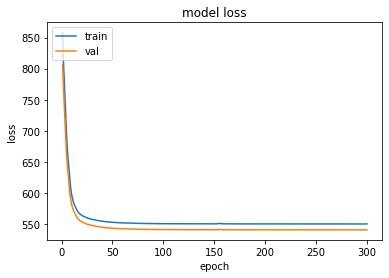

In [20]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
train_size2 = int(len(x_data) * 0.70) #학습 데이터 70%
test_size2 = len(x_data) - train_size2 #테스트 데이터 30%
train2, test2 = x_data[0:train_size2], x_data[train_size2:len(x_data)]

In [57]:
x_data

array([180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 181,
       181, 183, 183, 183, 185, 185, 187, 187, 190, 190, 194, 194, 197,
       197, 201, 201, 204, 204, 206, 206, 206, 209, 209, 213, 213, 215,
       215, 218, 218, 219, 219, 222, 222, 223, 223, 223, 224, 224, 226,
       226, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 229, 229, 229, 229, 229, 228, 228, 228, 226, 226, 223,
       223, 221, 221, 219, 219, 219, 218, 218, 215], dtype=int64)

In [58]:
train2

array([180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 181,
       181, 183, 183, 183, 185, 185, 187, 187, 190, 190, 194, 194, 197,
       197, 201, 201, 204, 204, 206, 206, 206, 209, 209, 213, 213, 215,
       215, 218, 218, 219, 219, 222, 222, 223, 223, 223, 224, 224, 226,
       226, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 229, 229, 229], dtype=int64)

In [60]:
test2

array([229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 228, 228, 228, 226, 226, 223, 223, 221, 221, 219, 219,
       219, 218, 218, 215], dtype=int64)

In [61]:
y_data

array([545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 546, 546, 546,
       546, 546, 546, 546, 546, 546, 544, 544, 542, 542, 540, 540, 537,
       537, 535, 535, 533, 533, 531, 531, 531, 528, 528, 523, 523, 519,
       519, 515, 515, 511, 511, 505, 505, 498, 498, 498, 491, 491, 486,
       486, 480, 480, 480, 475, 475, 468, 460, 460, 451, 451, 443, 443,
       443, 433, 421, 421, 421, 409, 409, 409, 398, 398, 386, 386, 386,
       373, 360, 360, 348, 348, 336, 336, 324, 324, 324, 314, 314, 304,
       304, 295, 295, 285, 285, 285, 276, 276, 267], dtype=int64)

In [62]:
train_size3 = int(len(y_data) * 0.70) #학습 데이터 70%
test_size3 = len(y_data) - train_size3 #테스트 데이터 30%
train3, test3 = y_data[0:train_size3], y_data[train_size3:len(y_data)]

In [63]:
train3

array([545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 546, 546, 546,
       546, 546, 546, 546, 546, 546, 544, 544, 542, 542, 540, 540, 537,
       537, 535, 535, 533, 533, 531, 531, 531, 528, 528, 523, 523, 519,
       519, 515, 515, 511, 511, 505, 505, 498, 498, 498, 491, 491, 486,
       486, 480, 480, 480, 475, 475, 468, 460, 460, 451, 451, 443, 443,
       443, 433, 421, 421, 421], dtype=int64)

In [64]:
test3

array([409, 409, 409, 398, 398, 386, 386, 386, 373, 360, 360, 348, 348,
       336, 336, 324, 324, 324, 314, 314, 304, 304, 295, 295, 285, 285,
       285, 276, 276, 267], dtype=int64)

In [31]:
#trainY -> (x,y)
Yx_train_plt=((x_data) * 0.70)
Yx_train_plt=np.array(Yx_train_plt)

Yy_train_plt=((y_data) * 0.70)
Yy_train_plt=np.array(Yy_train_plt)

#testX -> (x,y)
print(testPredict.shape)

Xx_test_plt=[]
Xy_test_plt=[]

for i in range(76):
    for j in range(99):
        Xx_test_plt.append(testPredict[i,j,0])
        Xy_test_plt.append(testPredict[i,j,1])
        
        j = j + 1
    i = i + 1

(76, 99, 3)


In [51]:
Yx_train_plt

array([126. , 126. , 126. , 126. , 126. , 126. , 126. , 126. , 126. ,
       126. , 126. , 126. , 126.7, 126.7, 128.1, 128.1, 128.1, 129.5,
       129.5, 130.9, 130.9, 133. , 133. , 135.8, 135.8, 137.9, 137.9,
       140.7, 140.7, 142.8, 142.8, 144.2, 144.2, 144.2, 146.3, 146.3,
       149.1, 149.1, 150.5, 150.5, 152.6, 152.6, 153.3, 153.3, 155.4,
       155.4, 156.1, 156.1, 156.1, 156.8, 156.8, 158.2, 158.2, 160.3,
       160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3,
       160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3,
       160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3, 160.3,
       160.3, 160.3, 160.3, 160.3, 159.6, 159.6, 159.6, 158.2, 158.2,
       156.1, 156.1, 154.7, 154.7, 153.3, 153.3, 153.3, 152.6, 152.6,
       150.5])

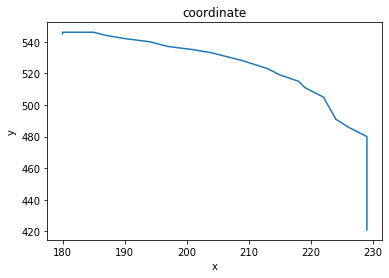

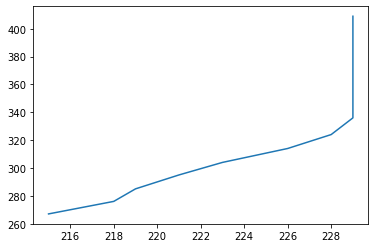

In [65]:
plt.title('coordinate')
plt.ylabel('y')
plt.xlabel('x')

plt.plot(train2, train3) #trainY -> (x,y) , blue
plt.show()

plt.plot(test2, test3) #testX -> (x,y)
plt.show()

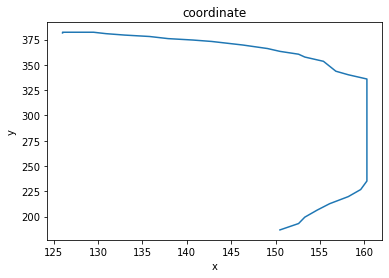

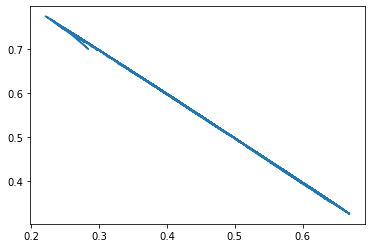

In [66]:
plt.title('coordinate')
plt.ylabel('y')
plt.xlabel('x')

plt.plot(Yx_train_plt,Yy_train_plt) #trainY -> (x,y) , blue
plt.show()

plt.plot(Xx_test_plt,Xy_test_plt) #testX -> (x,y)
plt.show()